In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
jnj_short_data = yf.download("JNJ", period="1mo", interval="2m")

[*********************100%***********************]  1 of 1 completed


In [3]:
jnj_short_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ,JNJ
Datetime,,,,,,
2024-12-16 14:30:00+00:00,146.649994,146.649994,146.899994,146.240005,146.729996,208177
2024-12-16 14:32:00+00:00,146.330002,146.330002,146.789902,146.229996,146.649994,33818
2024-12-16 14:34:00+00:00,146.710007,146.710007,146.740005,146.336395,146.395004,24830
2024-12-16 14:36:00+00:00,146.524994,146.524994,146.639999,146.399994,146.639999,38976
2024-12-16 14:38:00+00:00,146.684998,146.684998,146.860001,146.559998,146.580002,35377


In [4]:
jnj_short_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ,JNJ
Datetime,,,,,,
2025-01-15 16:46:00+00:00,144.550003,144.550003,144.647003,144.550003,144.639999,14562
2025-01-15 16:48:00+00:00,144.460007,144.460007,144.563004,144.410095,144.559998,14709
2025-01-15 16:50:00+00:00,144.559998,144.559998,144.574997,144.440094,144.440094,18887
2025-01-15 16:52:00+00:00,144.539993,144.539993,144.602600,144.524994,144.565002,16735
2025-01-15 16:54:00+00:00,144.449997,144.449997,144.554993,144.449997,144.539993,5784


In [5]:
jnj_short_data.shape

(3681, 6)

In [6]:
jnj_short_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3681 entries, 2024-12-16 14:30:00+00:00 to 2025-01-15 16:54:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, JNJ)  3681 non-null   float64
 1   (Close, JNJ)      3681 non-null   float64
 2   (High, JNJ)       3681 non-null   float64
 3   (Low, JNJ)        3681 non-null   float64
 4   (Open, JNJ)       3681 non-null   float64
 5   (Volume, JNJ)     3681 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 201.3 KB


In [7]:
# check for the missing values
jnj_short_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,JNJ,0
Close,JNJ,0
High,JNJ,0
Low,JNJ,0
Open,JNJ,0
Volume,JNJ,0


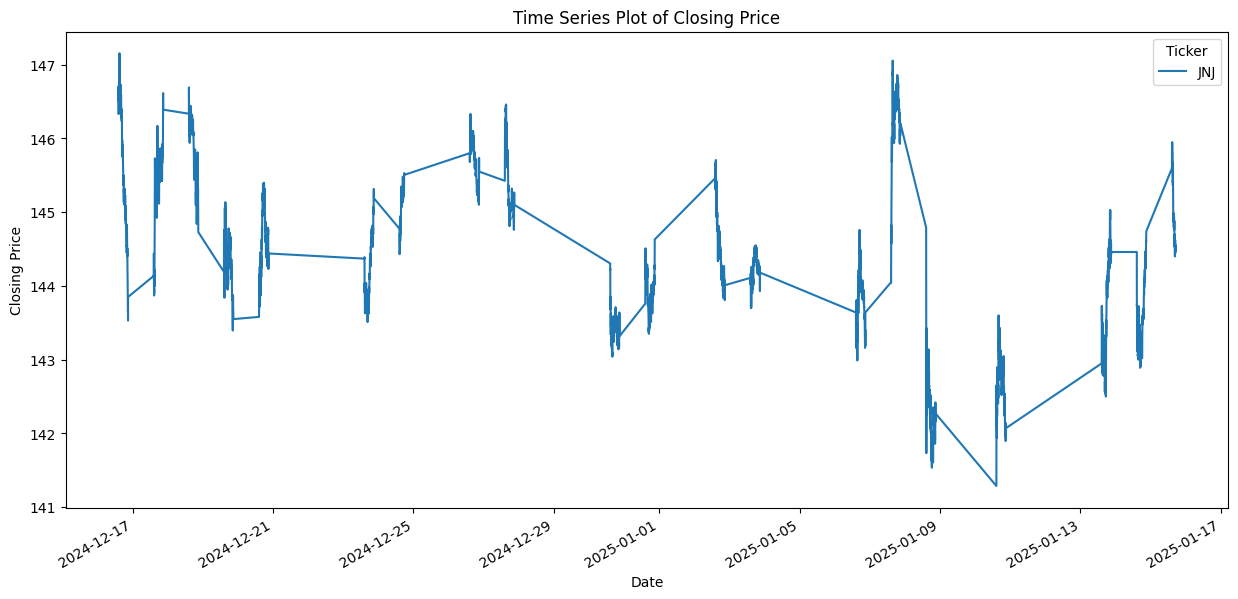

In [8]:
# time series plot
jnj_short_data['Close'].plot(figsize=(15,7))
plt.title('Time Series Plot of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

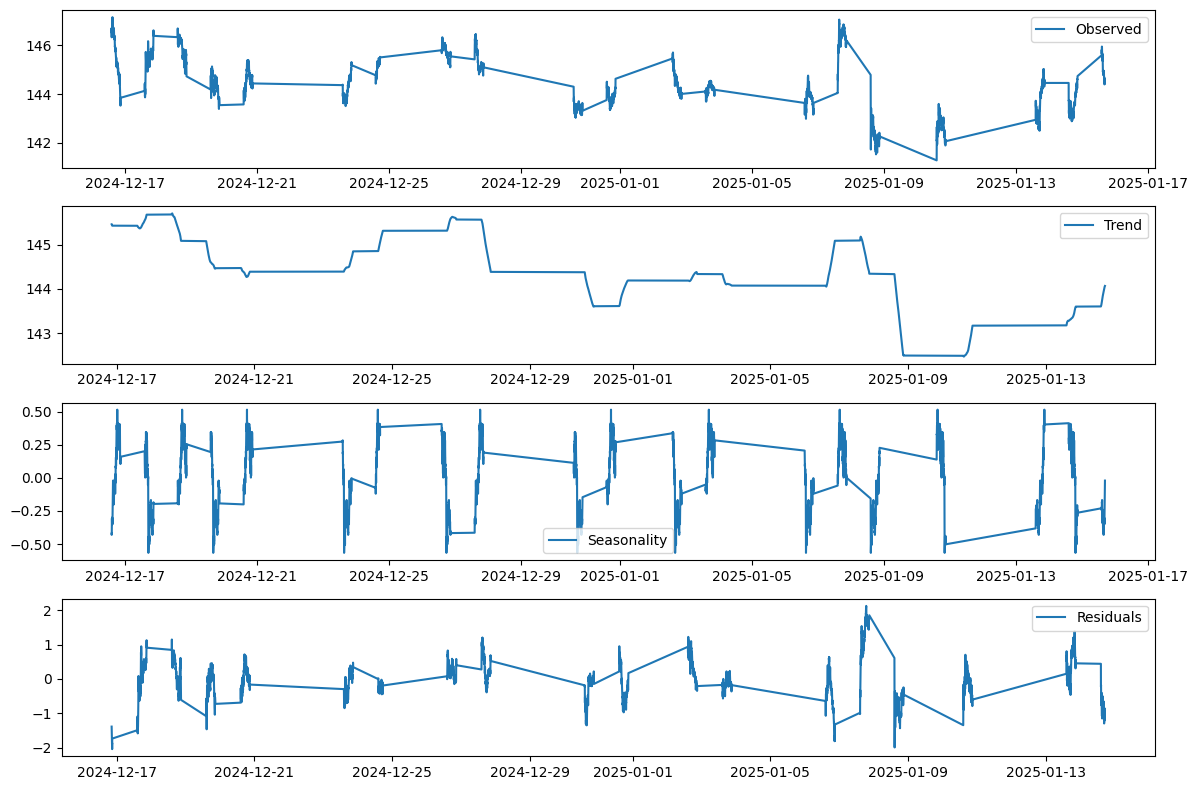

In [9]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(jnj_short_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

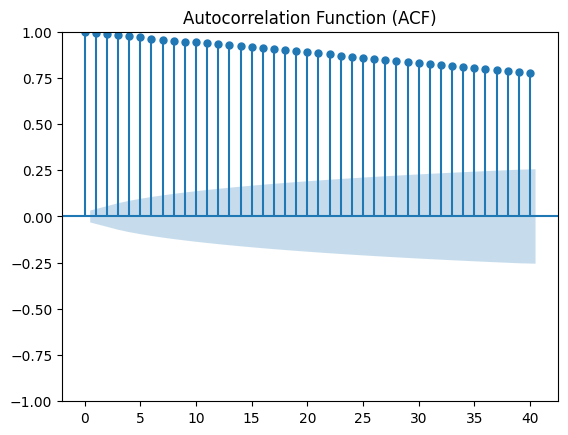

In [10]:
plt.figure(figsize=(10, 5))
plot_acf(jnj_short_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

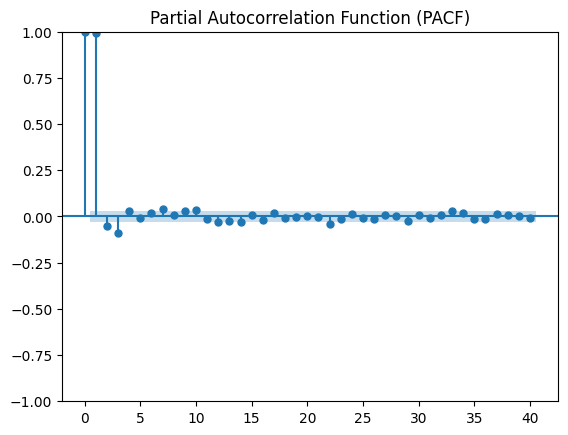

In [11]:
plt.figure(figsize=(10, 5))
plot_pacf(jnj_short_data['Close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [12]:
# get the Date out of the index
jnj_short_data.reset_index(inplace=True)

In [13]:
jnj_short_data

Price,Datetime,Adj Close,Close,High,Low,Open,Volume
Ticker,,JNJ,JNJ,JNJ,JNJ,JNJ,JNJ
0,2024-12-16 14:30:00+00:00,146.649994,146.649994,146.899994,146.240005,146.729996,208177
1,2024-12-16 14:32:00+00:00,146.330002,146.330002,146.789902,146.229996,146.649994,33818
2,2024-12-16 14:34:00+00:00,146.710007,146.710007,146.740005,146.336395,146.395004,24830
3,2024-12-16 14:36:00+00:00,146.524994,146.524994,146.639999,146.399994,146.639999,38976
4,2024-12-16 14:38:00+00:00,146.684998,146.684998,146.860001,146.559998,146.580002,35377
...,...,...,...,...,...,...,...
3676,2025-01-15 16:46:00+00:00,144.550003,144.550003,144.647003,144.550003,144.639999,14562
3677,2025-01-15 16:48:00+00:00,144.460007,144.460007,144.563004,144.410095,144.559998,14709
3678,2025-01-15 16:50:00+00:00,144.559998,144.559998,144.574997,144.440094,144.440094,18887


In [14]:
# isolet the Date and Sales columns
jnj_short_data = jnj_short_data[['Datetime', 'Close']]

In [15]:
jnj_short_data

Price,Datetime,Close
Ticker,,JNJ
0,2024-12-16 14:30:00+00:00,146.649994
1,2024-12-16 14:32:00+00:00,146.330002
2,2024-12-16 14:34:00+00:00,146.710007
3,2024-12-16 14:36:00+00:00,146.524994
4,2024-12-16 14:38:00+00:00,146.684998
...,...,...
3676,2025-01-15 16:46:00+00:00,144.550003
3677,2025-01-15 16:48:00+00:00,144.460007
3678,2025-01-15 16:50:00+00:00,144.559998


In [16]:
# Split into training and testing sets based on index
train_size = int(len(jnj_short_data) * 0.8)  # 80% for training
train_data = jnj_short_data[:train_size]
test_data = jnj_short_data[train_size:]

In [17]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [18]:
train_data

Price,Close
Ticker,JNJ
Datetime,
2024-12-16 14:30:00+00:00,146.649994
2024-12-16 14:32:00+00:00,146.330002
2024-12-16 14:34:00+00:00,146.710007
2024-12-16 14:36:00+00:00,146.524994
2024-12-16 14:38:00+00:00,146.684998
...,...
2025-01-08 18:12:00+00:00,141.630005
2025-01-08 18:14:00+00:00,141.710007


In [19]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2024-12-16 14:30:00+0000', tz='UTC'),
 Timestamp('2025-01-08 18:20:00+0000', tz='UTC'))

In [20]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2025-01-08 18:22:00+0000', tz='UTC'),
 Timestamp('2025-01-15 16:54:00+0000', tz='UTC'))

In [21]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close']])

In [22]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [23]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [24]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.1062
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0021
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0019
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0020
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0015
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
24.004115104675293


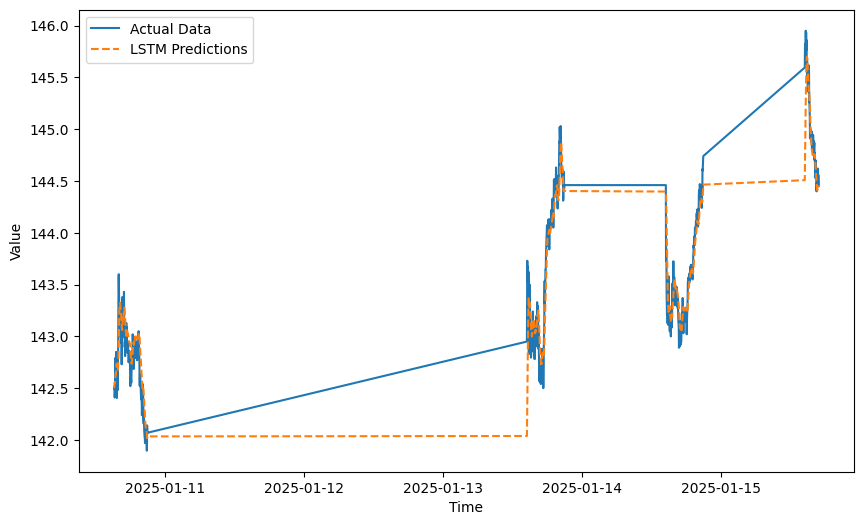

In [25]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [26]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

0.11153392982878739


In [27]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

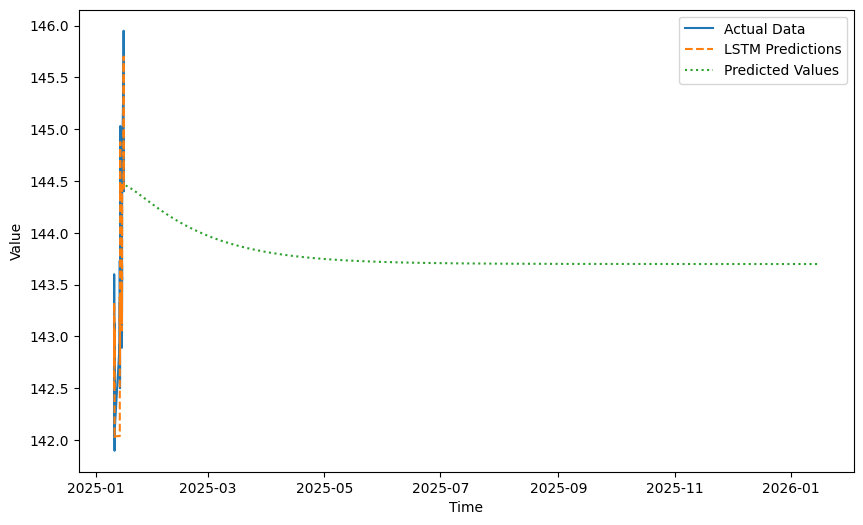

In [28]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()